In [2]:
#Read CSV file
# !pip install --upgrade pip
# !pip install --upgrade
# !pip install sympy

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Problem 1. Open data set veh.dat. \
The vector x refers to the number of buses operated during peak service. The vector y refers to the total operating costs. The vector z is vector y divided by vector x, and represents the operating cost er peak period vehicle. 

In [3]:
df = pd.read_csv('veh.dat', sep = '\t', header=0)
print(df)

      x        y       z
0    40  11719.1  292.98
1    11   1197.7  108.89
2    25   3881.0  155.24
3    14   1984.0  141.71
4     9    919.2  102.14
..   ..      ...     ...
348  46   7083.5  153.99
349   9   1154.3  128.26
350  14   2188.7  156.34
351  18   3244.0  180.22
352  11    444.4   40.40

[353 rows x 3 columns]


Problem 2. Create a histogram for vector x 

(array([324.,  18.,   6.,   1.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([2.0000e+00, 3.9050e+02, 7.7900e+02, 1.1675e+03, 1.5560e+03,
        1.9445e+03, 2.3330e+03, 2.7215e+03, 3.1100e+03, 3.4985e+03,
        3.8870e+03]),
 <BarContainer object of 10 artists>)

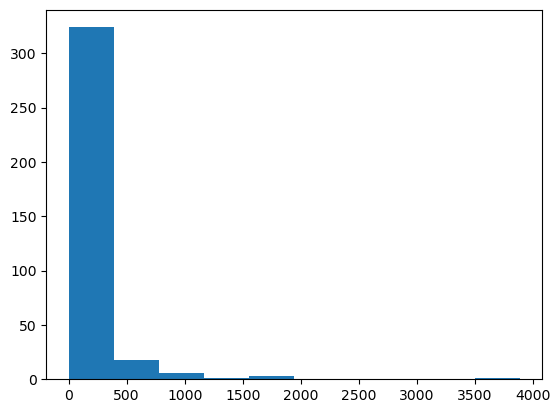

In [4]:
# a. Use default settings (10 equal bins) 
plt.hist(df.x)

(array([312.,  21.,   9.,   4.,   3.,   0.,   2.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([2.000e+00, 2.610e+02, 5.200e+02, 7.790e+02, 1.038e+03, 1.297e+03,
        1.556e+03, 1.815e+03, 2.074e+03, 2.333e+03, 2.592e+03, 2.851e+03,
        3.110e+03, 3.369e+03, 3.628e+03, 3.887e+03]),
 <BarContainer object of 15 artists>)

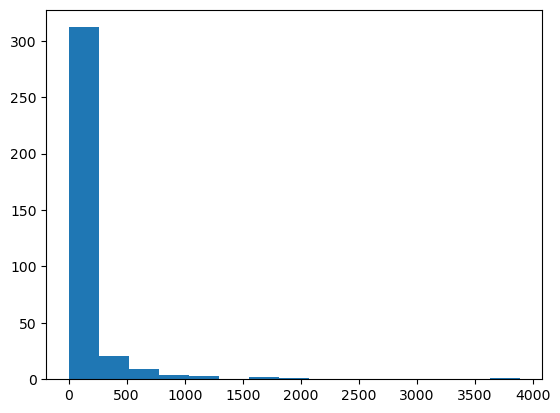

In [5]:
# b. Use more/less bins 
plt.hist(df.x, bins = 15, label='bins=15')

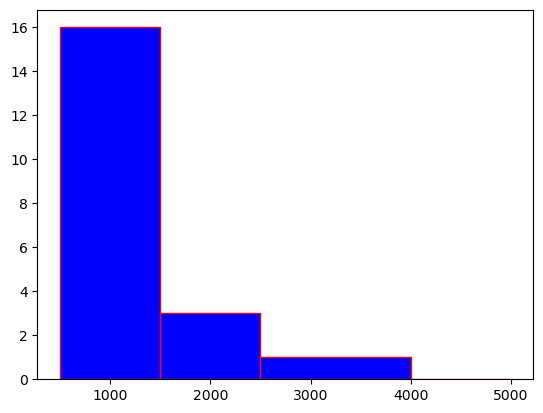

In [6]:
# c. Use unequal bins where n is a vector, returns the distribution of x among length of n bins with centers specified by n. 
# For example, if n is a 5-element vector, hist distributes the elements of x into 5 bins centered on the n-axis at the elements in n

n = [500, 1500, 2500, 4000, 5000]
plt.hist(df.x, bins = n, edgecolor='red', color='blue')
plt.show()

In [7]:
# d. Comment on the skewness. 
# Provide your answer: Positive? Negative? 

# 왼쪽에 치우쳐있으므로 왜도 < 0 ( Negative )

Problem 3. CDF of vector z

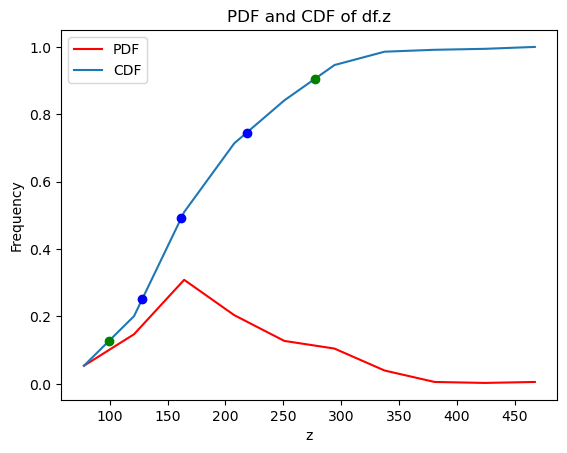

In [8]:
# Getting data of the histogram 
count, bins_count = np.histogram(df.z, bins=10) 
  
# Finding the PDF of the histogram using count values 
pdf = count / sum(count) 
  
# Using np.cumsum to calculate the CDF 
# We can also find using the PDF values by looping and adding 
# Provide your answer by filling the blanks
# Using np.percentile(z), find the quartiles, interquartile, and quantiles 
# at 0.1 and 0.9 cumulative frequencies. And mark the point on the cumulative frequency diagram. 
cdf = np.cumsum(pdf) 
  
# Using np.percentile to find the quartiles, interquartile, and quantiles at 0.1 and 0.9 cumulative frequencies 
df_z = df.z.to_numpy()  # Assuming df.z is a pandas Series
quartiles = np.percentile(df_z, [25, 50, 75])
interquartile = quartiles[2] - quartiles[0]
quantiles_01_09 = np.percentile(df_z, [10, 90])

# Plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF") 
plt.plot(bins_count[1:], cdf, label="CDF") 
plt.legend() 

# Mark the point on the cumulative frequency diagram for quartiles and quantiles at 0.1 and 0.9
for q in quartiles:
    plt.plot(q, np.interp(q, bins_count[1:], cdf), marker='o', color='blue', linestyle='none')
for quantile in quantiles_01_09:
    plt.plot(quantile, np.interp(quantile, bins_count[1:], cdf), marker='o', color='green', linestyle='none')

plt.xlabel('z')
plt.ylabel('Frequency')
plt.title('PDF and CDF of df.z')
plt.show()

Problem 4. Loot at vector z using a box plot.

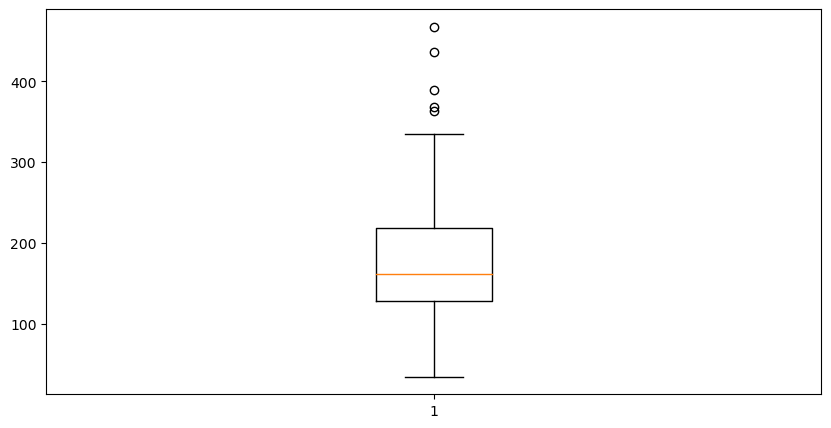

In [9]:
plt.figure(figsize = (10, 5))
plt.boxplot(df.z)
plt.show()

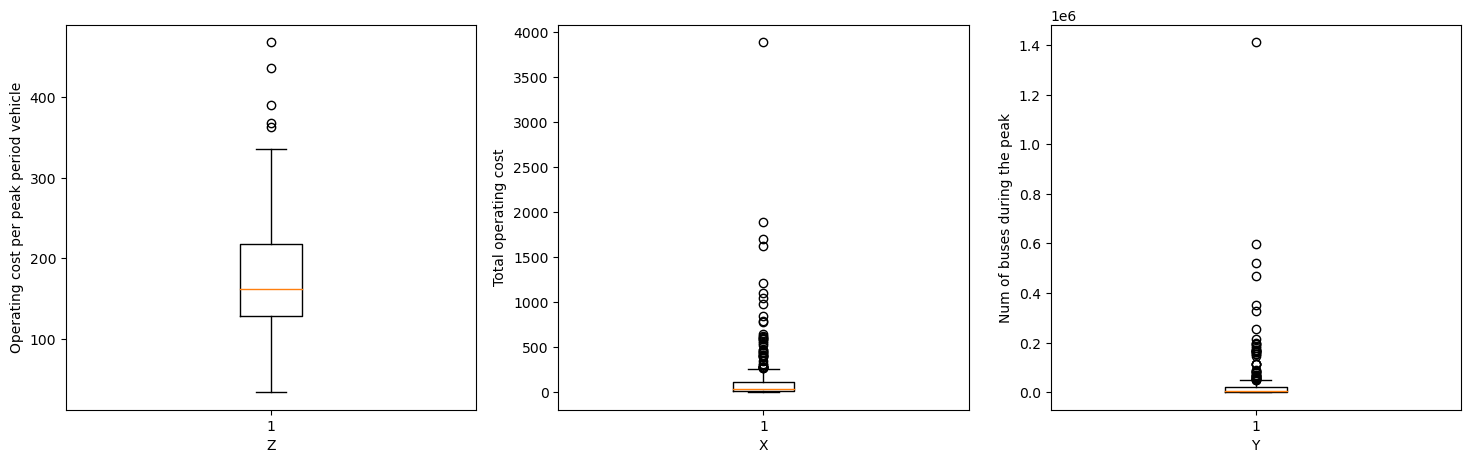

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18, 5))
ax1.boxplot(df.z)
ax2.boxplot(df.x)
ax3.boxplot(df.y)
ax1.set_xlabel('Z')
ax1.set_ylabel('Operating cost per peak period vehicle')
ax2.set_xlabel('X')
ax2.set_ylabel('Total operating cost')
ax3.set_xlabel('Y')
ax3.set_ylabel('Num of buses during the peak')
plt.show()


Problem 5. Compare vectors x and y (vehicles and total cost) by using a scatter plot.

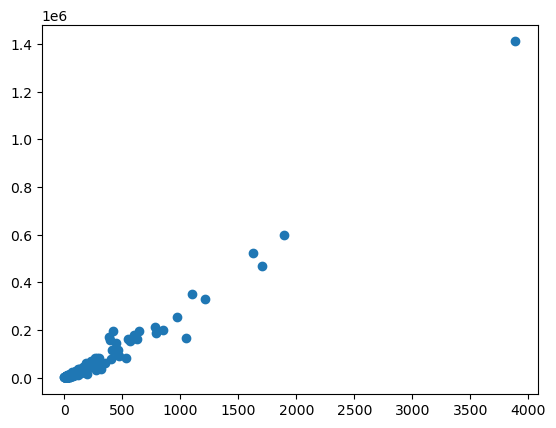

Correlation between vehicles and total cost is 0.9818165272682347


In [11]:
plt.scatter(df.x, df.y)
plt.show()

print('Correlation between vehicles and total cost is', np.corrcoef(df.x, df.y)[0,1])